# Hypothesis Testing in Healthcare: Drug Safety

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda).

Your organization has asked you to explore and answer some questions from the data collected. See the project instructions.

In [42]:
# Import packages
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")

# Start coding here...
drug_safety

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0
...,...,...,...,...,...,...,...,...
16098,78,male,Placebo,16,NaN,NaN,Yes,1
16099,78,male,Placebo,2,7.5,4.9,No,0
16100,78,male,Placebo,20,NaN,NaN,Yes,1
16101,78,male,Placebo,4,6.4,4.8,No,0


In [43]:
print("\n",drug_safety.trx.value_counts())

print("\n",drug_safety.adverse_effects.value_counts())

print("\n",drug_safety[['adverse_effects','trx']].value_counts(normalize = True))


 Drug       10727
Placebo     5376
Name: trx, dtype: int64

 No     14567
Yes     1536
Name: adverse_effects, dtype: int64

 adverse_effects  trx    
No               Drug       0.602559
                 Placebo    0.302056
Yes              Drug       0.063591
                 Placebo    0.031795
dtype: float64


In [44]:
print("\n",drug_safety[['adverse_effects','trx']].value_counts())


 adverse_effects  trx    
No               Drug       9703
                 Placebo    4864
Yes              Drug       1024
                 Placebo     512
dtype: int64


## Two Sample Proportion Test



| AdvEff/trx | Drug |Placebo|
|------------|------|------|
|Adv Event   |   1024 |   512 |
|No Adv Event|   9703|   4864|

$H_{O}$ : The proportion of adverse events is the same

$H_{A}$ : The proportion of adverse events is differebt

$ z = \frac{\hat{p_{1}} - \hat{p_{2}} - 0}{\sqrt{p_{o}*(1-p_{o})(n_{1}^{-1}+n_{2}^{-1})}}$

${p_{o}} = \frac{x_{1}+x_{2}}{n_{1}+n_{2}}$

- $\hat{p_{1}}$ and $\hat{p_{2}}$ are observed proportion of adverse events in both treatment regimen
- $n_{1}$ and $n_{2}$ are sample sizes
- $x_{1}$ and $x_{2}$ are counts of events of interest

In [45]:
import numpy as np
from scipy.stats import norm

alpha = 0.05

p1 = (1024/(1024+9703))
p2 = (512/(512+4864))
p0 = ((1024 + 512)/(1024+9703 + 512+4864))

numerator = p1 - p2

denom_2 = p0*(1-p0)*((1/(1024+9703))+(1/(512+4864)))
denominator = np.sqrt(denom_2)

z_score = numerator/denominator

print("z-statistic value : ",z_score)

two_sample_p_value = norm.cdf(-z_score) + 1 - norm.cdf(z_score)

print("p-value : ",two_sample_p_value)

if (two_sample_p_value<=alpha):
    print("\nReject Null Hypothesis and conclude that  proportion of adverse events is the same")
else:
    print("\nFail to reject null hypothesis and conclude that proportion of adverse events is the same")

z-statistic value :  0.0452182684494942
p-value :  0.9639333330262474

Fail to reject null hypothesis and conclude that proportion of adverse events is the same


## Chi-squared Test of Independence

In [46]:
# Determine if num_effects and trx are independent
expected, observed, stats = pingouin.chi2_independence(data = drug_safety, x = "num_effects", y = "trx")

stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,1.799644,3.0,0.615012,0.010572,0.176275
1,cressie-read,0.666667,1.836006,3.0,0.607131,0.010678,0.179153
2,log-likelihood,0.000000,1.922495,3.0,0.588648,0.010926,0.186033
3,freeman-tukey,-0.500000,2.001752,3.0,0.572043,0.011149,0.192379
4,mod-log-likelihood,-1.000000,2.096158,3.0,0.552690,0.011409,0.199984
5,neyman,-2.000000,2.344303,3.0,0.504087,0.012066,0.220189


In [47]:
num_effects_p_value = stats[stats['test']=='pearson']['pval'][0]
print(num_effects_p_value)

0.6150123339426765


## Check for Normality : Visualization

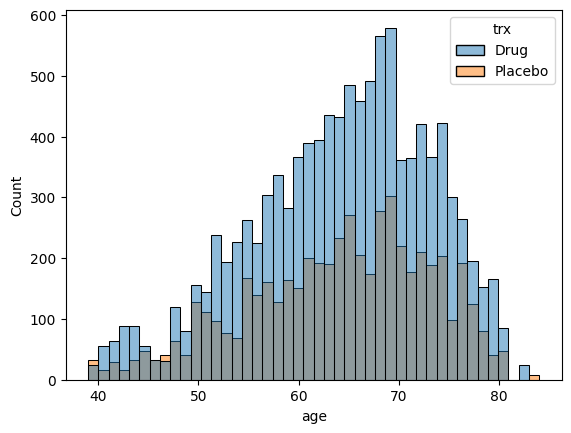

In [48]:
sns.histplot(data = drug_safety,
            x = 'age',
            hue = 'trx')

placebo_group = drug_safety[drug_safety['trx']=='Placebo']
drug_group = drug_safety[drug_safety['trx']=='Drug']

## Check for Normality : Shapiro Test

In [49]:
from scipy.stats import shapiro

# Shapiro Wilik Test for Drug group
stat, p_val = shapiro(drug_safety[drug_safety['trx']=='Drug']['age'])
print("\np-value for Drug group",p_val)

# Shapiro Wilik Test for Placebo group
stat, p_val = shapiro(drug_safety[drug_safety['trx']=='Placebo']['age'])
print("\np-value for Placebo group",p_val)

print("\np-value for both groups is very low, therefore we reject null hypothesis and conclude that the distribution is not normal. \nHence, we will have to use non-parameteric test for any further analysis")


p-value for Drug group 2.1891523216101626e-38

p-value for Placebo group 2.224949827552798e-29

p-value for both groups is very low, therefore we reject null hypothesis and conclude that the distribution is not normal. 
Hence, we will have to use non-parameteric test for any further analysis


## Mann Whitney U Test

In [50]:
age_vs_trx = drug_safety[['trx', 'age']]

age_vs_trx_wide = age_vs_trx.pivot(columns='trx',values='age')

alpha = 0.01

mwu_test = pingouin.mwu(x = age_vs_trx_wide['Drug'],
                        y = age_vs_trx_wide['Placebo'],
                        alternative = 'two-sided')

age_group_effects_p_value = mwu_test['p-val']

mwu_test


,U-val,alternative,p-val,RBC,CLES
MWU,29149339.5,two-sided,0.256963,-0.01093,0.505465


In [51]:
print(two_sample_p_value)
print(num_effects_p_value)
print(age_group_effects_p_value)

0.9639333330262474
0.6150123339426765
MWU    0.256963
Name: p-val, dtype: float64


## Car Manufacturer Example

Reference : https://sixsigmastudyguide.com/two-sample-test-of-proportions/

A car manufacturer aims to improve the quality of the products by reducing the defects and also increase the customer satisfaction. Therefore, he monitors the efficiency of two assembly lines in the shop floor. In line A there are 18 defects reported out of 200 samples. While the line B shows 25 defects out of 600 cars. At α 5%, is the differences between two assembly procedures are significant?

|       |Line A|Line B|
|-------|------|------|
|Defects|   18 |   25 |
|No Def.|   182|   575|

**significance Level** = 0.05

$H_{O}$ : The proportion of defects is the same

$H_{A}$ : The proportion of defects is different

$ z = \frac{\hat{p_{1}} - \hat{p_{2}} - 0}{\sqrt{p_{o}*(1-p_{o})(n_{1}^{-1}+n_{2}^{-1})}}$

${p_{o}} = \frac{x_{1}+x_{2}}{n_{1}+n_{2}}$

- $\hat{p_{1}}$ and $\hat{p_{2}}$ are observed proportion of events in the two samples
- $n_{1}$ and $n_{2}$ are sample sizes
- $x_{1}$ and $x_{2}$ are counts of events of interest

In [52]:
import numpy as np
from scipy.stats import norm

alpha = 0.05

p1 = (18/200)
p2 = (25/600)
p0 = ((18 + 25)/(200 + 600))

numerator = p1 - p2

denom_2 = p0*(1-p0)*((1/200)+(1/600))
denominator = np.sqrt(denom_2)

z_score = numerator/denominator

print("z-statistic value : ",z_score)

p_value = norm.cdf(-z_score) + 1 - norm.cdf(z_score)

print("p-value : ",p_value)

if (p_value<=alpha):
    print("\nReject Null Hypothesis")
else:
    print("\nFail to reject null hypothesis")

z-statistic value :  2.624824049200042
p-value :  0.008669375420073067

Reject Null Hypothesis
